#Resolutions for all Regions

In [1]:
# This will force external files to be reloaded
%load_ext autoreload
%autoreload 2
import utils.rootprint
import utils.rootnotes
from array import array

from utils.plotting import *

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors
import math
# from itertools import chain

import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [56]:
constants_dir = "/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/"


region = 9


# fit_type_list = [["NineRegions/FlatOneOverPt/Combinations_OldBaseline_PT_RANGE/AppliedOnFlatPt",
#                   "Old baseline, derived on flat $1/p_{T}$"],
#                  ["NineRegions/FlatOneOverPt/Combinations_FullCorrections_PT_RANGE/AppliedOnFlatPt",
#                   "Full corrections, derived on flat $1/p_{T}$"],
#                  ["NineRegions/FlatOneOverPt/Combinations_FullCorrections_PT_RANGE_flatPtTgThetaAndPtPreEstimate/AppliedOnFlatPt",
#                   "Full corrections, derived on flat $1/p_{T}$"],
#                  ["FourteenRegions/FlatOneOverPt/Combinations_FullCorrections_PT_RANGE_flatPtTgThetaAndPtPreEstimate/AppliedOnFlatPt",
#                   "Full corrections, derived on flat $1/p_{T}$, 14 combinations"]]

fit_type_list = [["NineRegions/FlatOneOverPt/Combinations_OldBaseline_PT_RANGE/AppliedOnFlatPt",
                  "Old baseline"],
                 ["FourteenRegions/FlatOneOverPt/Combinations_FullCorrections_PT_RANGE_flatPtTgThetaAndPtPreEstimate/AppliedOnFlatPt",
                  "New baseline"]]


def fill_file_name_legend_for_5_6(pt_range, region):
    file_name_lists = []
    legend_entry_list = []
    x_axis_entry_list = []
    for fit_type_name in fit_type_list:
        fit_type = fit_type_name[0].replace("PT_RANGE", pt_range)
        regions_number = 9
        if fit_type.find("FourteenRegions") != -1:
            regions_number = 14
            if region == 4:
                region = 5
            elif region == 5:
                # region = 7
                region = 8
            elif region == 6:
                region = 9
            elif region == 7:
                region = 11
            elif region == 8:
                region = 13
            elif region == 9:
                region = 14
        file_name_list, x_axis_entry_list = generate_files_and_legend_entry_list(region, constants_dir,
                                                                                 fit_type, regions_number, "No")
        file_name_lists.append(file_name_list)
        legend_entry_list.append(fit_type_name[1])
    return file_name_lists, legend_entry_list, x_axis_entry_list

#Low pT

##pT Bias and Resolution

In [17]:
file_name_lists, legend_entry_list, x_axis_entry_list = fill_file_name_legend_for_5_6("2_10", region)
pt_histo = "EstimatedParRelError_summary_charge/pt"
h, fit_results = fit_all(file_name_lists, pt_histo)

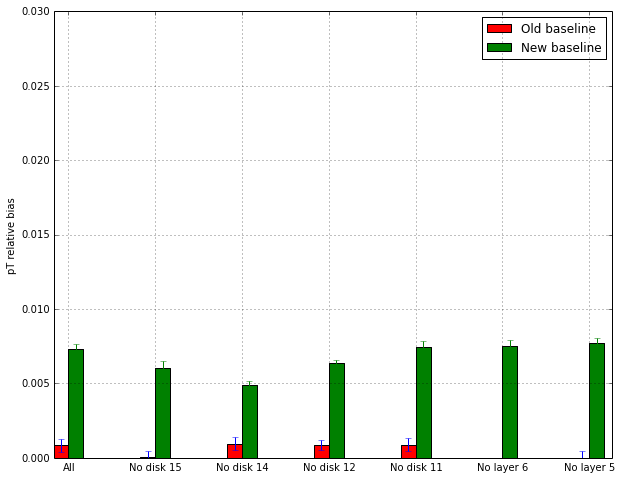

In [18]:
plt = plot_combinations(fit_results, 0, 'pT relative bias', x_axis_entry_list, legend_entry_list, y_max = 0.03)
plt.show()

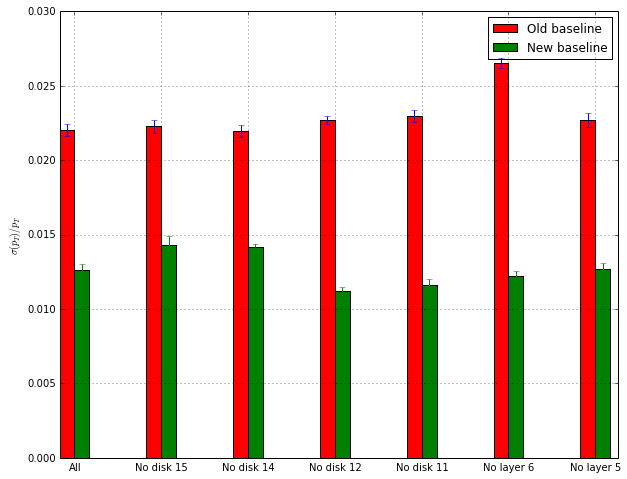

In [20]:
plt = plot_combinations(fit_results, 2, '$\sigma(p_{T})/p_{T}$', x_axis_entry_list, legend_entry_list, y_max = 0.03)
plt.show()

##Phi0 Bias and resolution

In [21]:
phi0_histo = "EstimatedParError_summary_phi"
h, fit_results = fit_all(file_name_lists, phi0_histo)

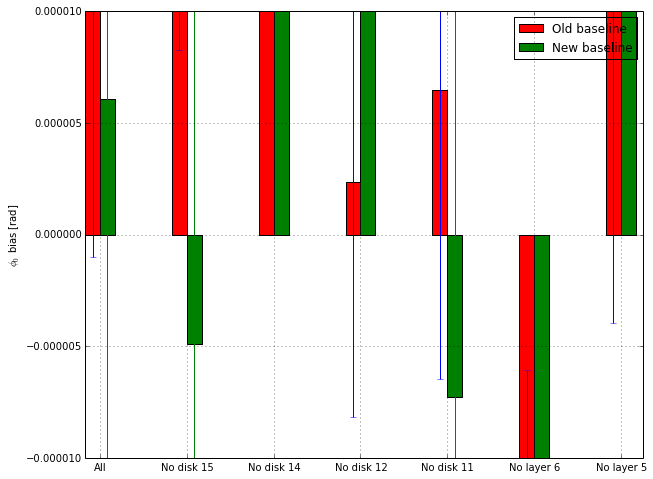

In [22]:
plt = plot_combinations(fit_results, 0, '$\phi_0$ bias [rad]', x_axis_entry_list,
                        legend_entry_list, y_min=-0.00001, y_max=0.00001)
plt.show()

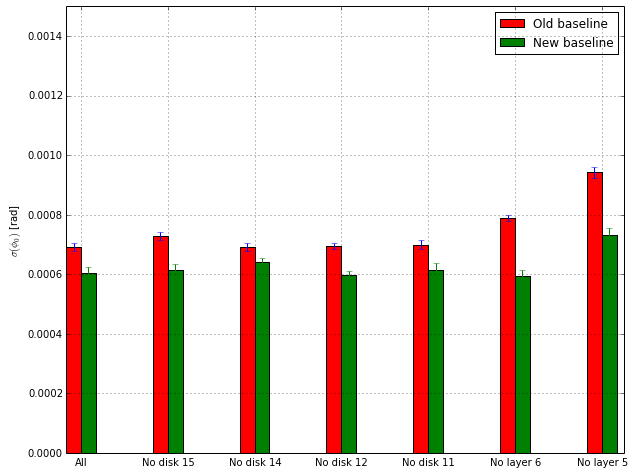

In [23]:
plt = plot_combinations(fit_results, 2, '$\sigma(\phi_0)$ [rad]', x_axis_entry_list,
                        legend_entry_list, y_max = 0.0015)
plt.show()

#High pT

In [46]:
# fit_type_list = [["NineRegions/FlatOneOverPt/Combinations_OldBaseline_PT_RANGE/AppliedOnFlatPt",
#                   "Old baseline, derived on flat $1/p_{T}$"],
#                  ["NineRegions/FlatOneOverPt/Combinations_FullCorrections_PT_RANGE/AppliedOnFlatPt",
#                   "Full corrections, derived on flat $1/p_{T}$"],
#                  ["NineRegions/FlatPt/Combinations_FullCorrections_PT_RANGE_flatPtTgThetaAndPtPreEstimate",
#                   "Full corrections, derived on flat $p_{T}$"],
#                  ["FourteenRegions/FlatPt/Combinations_FullCorrections_PT_RANGE_flatPtTgThetaAndPtPreEstimate",
#                   "Full corrections, derived on flat $p_{T}$, 14 combinations"]]

fit_type_list = [["NineRegions/FlatOneOverPt/Combinations_OldBaseline_PT_RANGE/AppliedOnFlatPt",
                  "Old baseline"],
                 ["FourteenRegions/FlatPt/Combinations_FullCorrections_PT_RANGE_flatPtTgThetaAndPtPreEstimate",
                  "New baseline"]]


file_name_lists, legend_entry_list, x_axis_entry_list = fill_file_name_legend_for_5_6("10_more", region)
pt_histo = "EstimatedParRelError_summary_charge/pt"
h, fit_results = fit_all(file_name_lists, pt_histo)

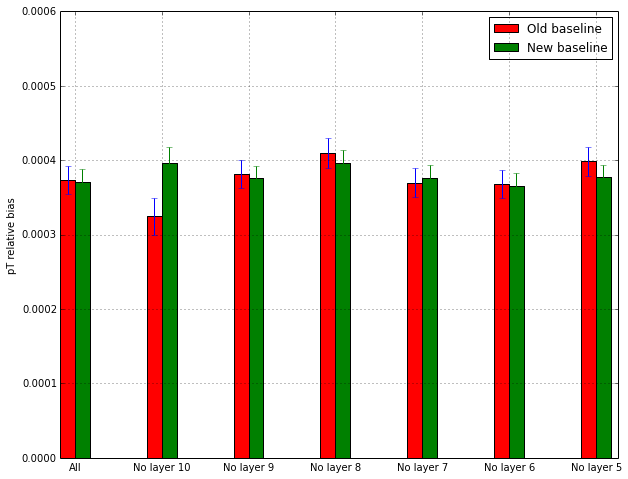

In [47]:
plt = plot_combinations(fit_results, 0, 'pT relative bias', x_axis_entry_list, legend_entry_list, y_max = 0.0006)
plt.show()

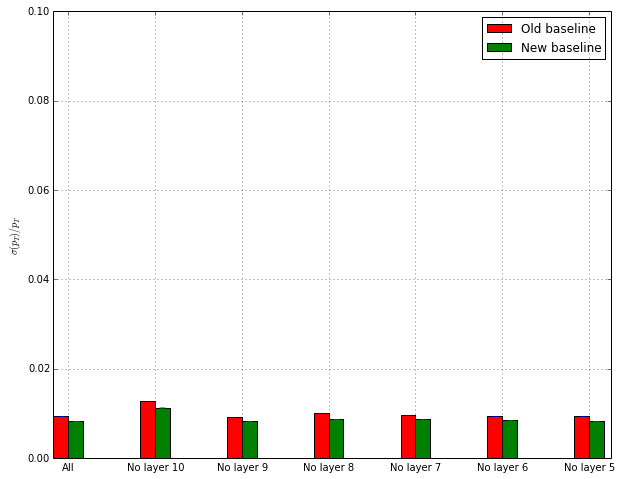

In [48]:
plt = plot_combinations(fit_results, 2, '$\sigma(p_{T})/p_{T}$', x_axis_entry_list, legend_entry_list, y_max = 0.1)
plt.show()

In [15]:
phi0_histo = "EstimatedParError_summary_phi"
h, fit_results = fit_all(file_name_lists, phi0_histo)

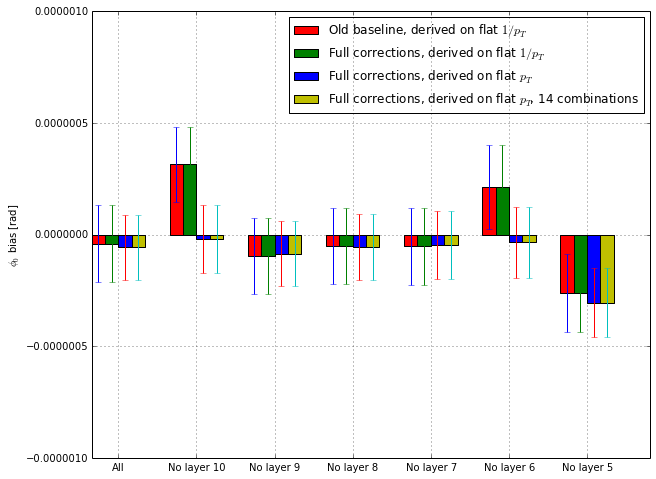

In [16]:
plt = plot_combinations(fit_results, 0, '$\phi_0$ bias [rad]', x_axis_entry_list,
                        legend_entry_list, y_min=-0.000001, y_max=0.000001)
plt.show()

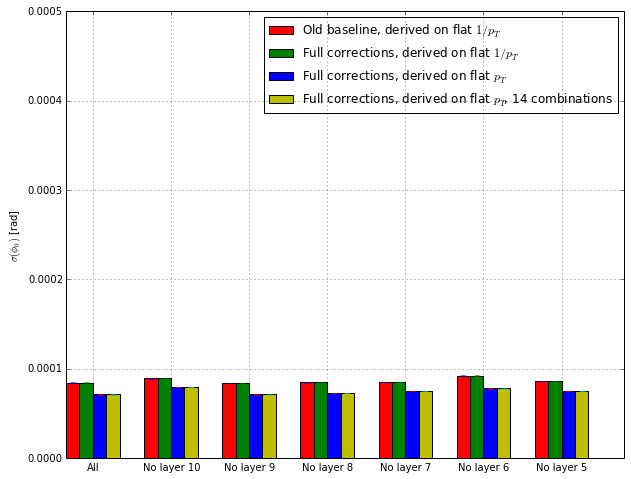

In [17]:
plt = plot_combinations(fit_results, 2, '$\sigma(\phi_0)$ [rad]', x_axis_entry_list,
                        legend_entry_list, y_max = 0.0005)
plt.show()

## Z0 Bias and Resolution

In [57]:
# fit_type_list = [["NineRegions/FlatOneOverPt/Combinations_Longitudinal_Rz/AppliedOnFlatPt",
#                   "Old baseline, derived on flat $1/p_{T}$"],
#                  ["NineRegions/FlatPt/Combinations_Longitudinal_Rz_flatPtTgThetaAndPtPreEstimate",
#                   "Old baseline, derived on flat $p_{T}$"],
#                  ["FourteenRegions/FlatPt/Combinations_Longitudinal_Rz_flatPtTgThetaAndPtPreEstimate",
#                   "Old baseline, derived on flat $p_{T}$, 14 combinations"]]

fit_type_list = [["NineRegions/FlatOneOverPt/Combinations_Longitudinal_Rz/AppliedOnFlatPt",
                  "Old baseline"],
                 ["FourteenRegions/FlatPt/Combinations_Longitudinal_Rz_flatPtTgThetaAndPtPreEstimate",
                  "New baseline"]]


file_name_lists, legend_entry_list, x_axis_entry_list = fill_file_name_legend_for_5_6("2_10", region)
z0_histo = "EstimatedParError_summary_z0"
h, fit_results = fit_all(file_name_lists, z0_histo)

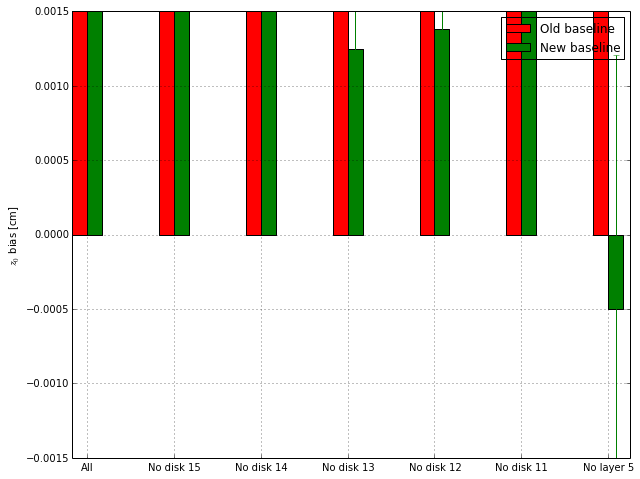

In [58]:
plt = plot_combinations(fit_results, 0, '$z_0$ bias [cm]', x_axis_entry_list,
                        legend_entry_list, y_min=-0.0015, y_max=0.0015)
plt.show()

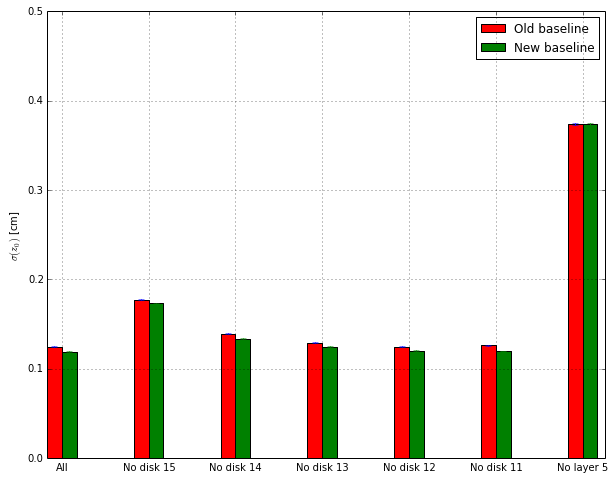

In [59]:
plt = plot_combinations(fit_results, 2, '$\sigma(z_0)$ [cm]', x_axis_entry_list,
                        legend_entry_list, y_max=0.5)
plt.show()

##CotTheta Bias and Resolution

In [325]:
cotTheta_histo = "EstimatedParError_summary_cotTheta"
h, fit_results = fit_all(file_name_lists, cotTheta_histo)

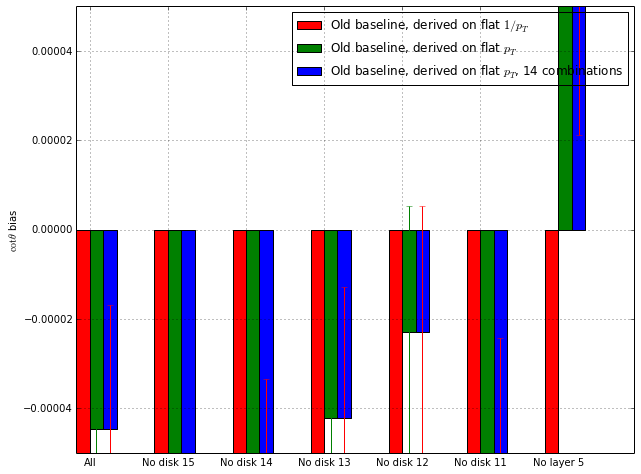

In [326]:
plt = plot_combinations(fit_results, 0, '$\cot\\theta$ bias', x_axis_entry_list,
                        legend_entry_list, y_min=-0.00005, y_max=0.00005)
plt.show()

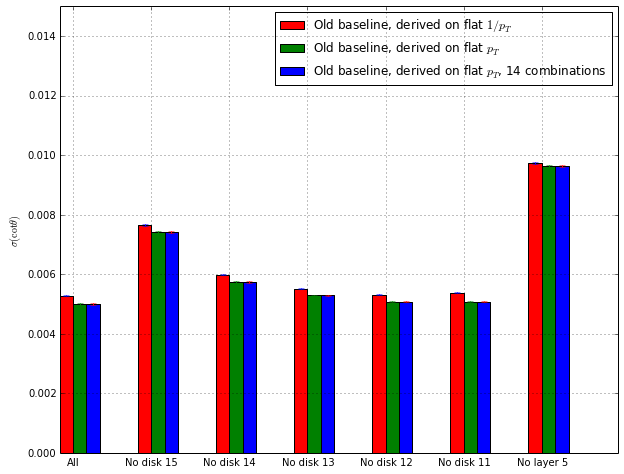

In [328]:
plt = plot_combinations(fit_results, 2, '$\sigma(\cot\\theta)$', x_axis_entry_list,
                        legend_entry_list, y_max=0.015)
plt.show()